In [64]:
import librosa  
var = 800
filename = '/home/jaihonikhil/Downloads/Protocol_Good_2_Left (Good in the End).wav'
y, s = librosa.load(filename,var)
print(s)
print(y)
print(y.shape)

800
[ 1.1964588e-06 -9.7931422e-07  4.5948582e-07 ...  3.1838968e-02
  1.9926734e-02  0.0000000e+00]
(11924,)


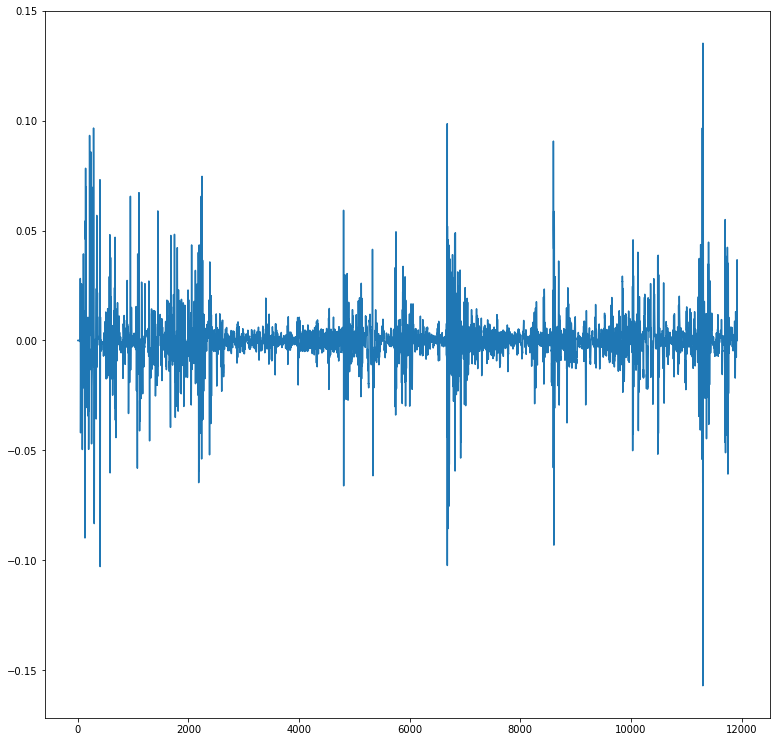

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert, chirp

y1=np.array(y)
Fs = s
# sample=var*20

x =np.arange(len(y))
# x = np.arange(sample)

ty = hilbert(y1)
y2 = np.abs(ty)
plt.figure(figsize=(13,13))
plt.plot(x, y1)
plt.show()

In [66]:
import wave
obj = wave.open(filename,'r')
print( "Number of channels",obj.getnchannels())
print ( "Sample width",obj.getsampwidth())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
print ( "parameters:",obj.getparams())
obj.close()

Number of channels 2
Sample width 2
Frame rate. 48000
Number of frames 715392
parameters: _wave_params(nchannels=2, sampwidth=2, framerate=48000, nframes=715392, comptype='NONE', compname='not compressed')


()
(11424,)


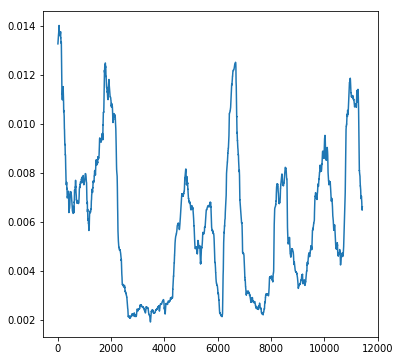

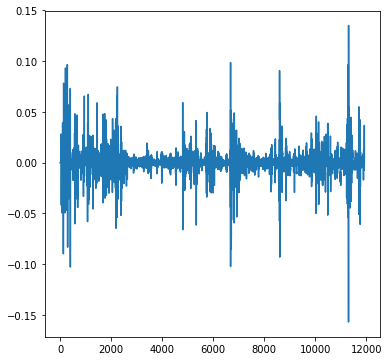

In [67]:
def getEnvel (inputSignal):

    # Taking the absolute value

    absoluteSignal = []
    for sample in inputSignal:
        absoluteSignal.append (abs (sample))

    # Peak detection

    intervalLength = 500 # Experiment with this number, it depends on your sample frequency and highest "whistle" frequency
    outputSignal = []

    for baseIndex in range (intervalLength, len (absoluteSignal)):
        maximum = np.mean(absoluteSignal[baseIndex-intervalLength:baseIndex])
        outputSignal.append (maximum)
    print(maximum.shape)
    return outputSignal

qw = getEnvel(y1)
qw=np.array(qw)
print(qw.shape)

plt.figure(figsize=(6,6))
plt.plot(x[:len(y)-500], qw)
plt.show()

plt.figure(figsize=(6,6))
plt.plot(x, y1)
plt.show()
xt = x[:len(y)-500]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


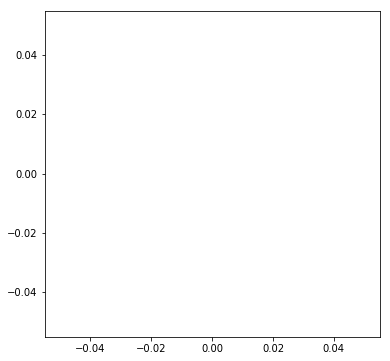

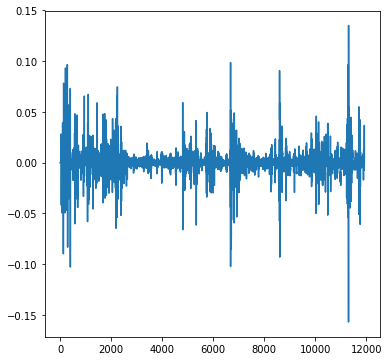

2856


In [68]:

from matplotlib import pyplot as plt

# L = np.array([2.762, 2.762, 1.508, 2.758, 2.765, 2.765, 2.761, 1.507, 2.757, 2.757, 2.764, 2.764, 1.512, 2.76, 2.766, 2.766, 2.763, 1.51, 2.759, 2.759, 2.765, 2.765, 1.514, 2.761, 2.758, 2.758, 2.764, 1.513, 2.76, 2.76, 2.757, 2.757, 1.508, 2.763, 2.759, 2.759, 2.766, 1.517, 4.012])
L = qw


L = np.round(L, 1)
# Remove DC component, as proposed by Nils Werner
L -= np.mean(L)
# Window signal
#L *= scipy.signal.windows.hann(len(L))

fft = np.fft.rfft(L, norm="ortho")

def abs2(x):
    return x.real**2 + x.imag**2

selfconvol=np.fft.irfft(abs2(fft), norm="ortho")
selfconvol=selfconvol/selfconvol[0]

plt.figure(figsize=(6,6))
plt.plot(selfconvol)
plt.savefig('first.jpg')
plt.show()

plt.figure(figsize=(6,6))
plt.plot(x,y1)
plt.savefig('first.jpg')
plt.show()

print(len(L)//4)
# # let's get a max, assuming a least 4 periods...
# multipleofperiod=np.argmax(selfconvol[1:len(L)//4])
# Ltrunk=L[0:(len(L)//multipleofperiod)*multipleofperiod]

# fft = np.fft.rfft(Ltrunk, norm="ortho")
# selfconvol=np.fft.irfft(abs2(fft), norm="ortho")
# selfconvol=selfconvol/selfconvol[0]

# plt.figure(figsize=(13,13))
# plt.plot(selfconvol)
# plt.savefig('second.jpg')
# plt.show()


# #get ranges for first min, second max
# fmax=np.max(selfconvol[1:len(Ltrunk)//4])
# fmin=np.min(selfconvol[1:len(Ltrunk)//4])
# xstartmin=1
# while selfconvol[xstartmin]>fmin+0.2*(fmax-fmin) and xstartmin< len(Ltrunk)//4:
#     xstartmin=xstartmin+1

# xstartmax=xstartmin
# while selfconvol[xstartmax]<fmin+0.7*(fmax-fmin) and xstartmax< len(Ltrunk)//4:
#     xstartmax=xstartmax+1

# xstartmin=xstartmax
# while selfconvol[xstartmin]>fmin+0.2*(fmax-fmin) and xstartmin< len(Ltrunk)//4:
#     xstartmin=xstartmin+1

# period=np.argmax(selfconvol[xstartmax:xstartmin])+xstartmax

# print("The period is ",period)


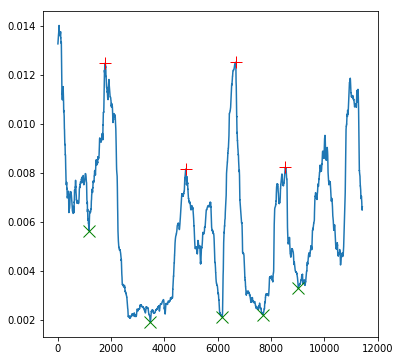

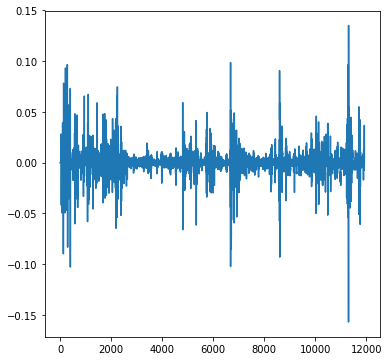

In [69]:

def peakdetect(y_axis, x_axis = None, lookahead = 500, delta = 0):
    """
    Converted from/based on a MATLAB script at http://billauer.co.il/peakdet.html
    
    Algorithm for detecting local maximas and minmias in a signal.
    Discovers peaks by searching for values which are surrounded by lower
    or larger values for maximas and minimas respectively
    
    keyword arguments:
    y_axis -- A list containg the signal over which to find peaks
    x_axis -- A x-axis whose values correspond to the 'y_axis' list and is used
        in the return to specify the postion of the peaks. If omitted the index
        of the y_axis is used. (default: None)
    lookahead -- (optional) distance to look ahead from a peak candidate to
        determine if it is the actual peak (default: 500) 
        '(sample / period) / f' where '4 >= f >= 1.25' might be a good value
    delta -- (optional) this specifies a minimum difference between a peak and
        the following points, before a peak may be considered a peak. Useful
        to hinder the algorithm from picking up false peaks towards to end of
        the signal. To work well delta should be set to 'delta >= RMSnoise * 5'.
        (default: 0)
            Delta function causes a 20% decrease in speed, when omitted
            Correctly used it can double the speed of the algorithm
    
    return -- two lists [maxtab, mintab] containing the positive and negative
        peaks respectively. Each cell of the lists contains a tupple of:
        (position, peak_value) 
        to get the average peak value do 'np.mean(maxtab, 0)[1]' on the results
    """
    maxtab = []
    mintab = []
    dump = []   #Used to pop the first hit which always if false
       
    length = len(y_axis)
    if x_axis is None:
        x_axis = range(length)
    
    #perform some checks
    if length != len(x_axis):
        raise ValueError("Input vectors y_axis and x_axis must have same length")
    if lookahead < 1:
        raise ValueError("Lookahead must be above '1' in value")
    if not (np.isscalar(delta) and delta >= 0):
        raise ValueError("delta must be a positive number")
    
    #needs to be a numpy array
    y_axis = np.asarray(y_axis)
    
    #maxima and minima candidates are temporarily stored in
    #mx and mn respectively
    mn, mx = np.Inf, -np.Inf
    
    #Only detect peak if there is 'lookahead' amount of points after it
    for index, (x, y) in enumerate(zip(x_axis[:-lookahead], y_axis[:-lookahead])):
        if y > mx:
            mx = y
            mxpos = x
        if y < mn:
            mn = y
            mnpos = x
        
        ####look for max####
        if y < mx-delta and mx != np.Inf:
            #Maxima peak candidate found
            #look ahead in signal to ensure that this is a peak and not jitter
            if y_axis[index:index+lookahead].max() < mx:
                maxtab.append((mxpos, mx))
                dump.append(True)
                #set algorithm to only find minima now
                mx = np.Inf
                mn = np.Inf
        
        ####look for min####
        if y > mn+delta and mn != -np.Inf:
            #Minima peak candidate found 
            #look ahead in signal to ensure that this is a peak and not jitter
            if y_axis[index:index+lookahead].min() > mn:
                mintab.append((mnpos, mn))
                dump.append(False)
                #set algorithm to only find maxima now
                mn = -np.Inf
                mx = -np.Inf
    
    
    #Remove the false hit on the first value of the y_axis
    try:
        if dump[0]:
            maxtab.pop(0)
            #print "pop max"
        else:
            mintab.pop(0)
            #print "pop min"
        del dump
    except IndexError:
        #no peaks were found, should the function return empty lists?
        pass
    
    return maxtab, mintab



def peakdetect_zero_crossing(y_axis, x_axis = None, window = 49):
    """
    Algorithm for detecting local maximas and minmias in a signal.
    Discovers peaks by dividing the signal into bins and retrieving the
    maximum and minimum value of each the even and odd bins respectively.
    Division into bins is performed by smoothing the curve and finding the
    zero crossings.
    
    Suitable for repeatable sinusoidal signals with some amount of RMS noise
    tolerable. Excecutes faster than 'peakdetect', although this function will
    break if the offset of the signal is too large. It should also be noted
    that the first and last peak will probably not be found, as this algorithm
    only can find peaks between the first and last zero crossing.
    
    keyword arguments:
    y_axis -- A list containg the signal over which to find peaks
    x_axis -- A x-axis whose values correspond to the 'y_axis' list and is used
        in the return to specify the postion of the peaks. If omitted the index
        of the y_axis is used. (default: None)
    window -- the dimension of the smoothing window; should be an odd integer
        (default: 49)
    
    return -- two lists [maxtab, mintab] containing the positive and negative
        peaks respectively. Each cell of the lists contains a tupple of:
        (position, peak_value) 
        to get the average peak value do 'np.mean(maxtab, 0)[1]' on the results
    """
    if x_axis is None:
        x_axis = range(len(y_axis))
    
    length = len(y_axis)
    if length != len(x_axis):
        raise ValueError('Input vectors y_axis and x_axis must have same length')
    
    #needs to be a numpy array
    y_axis = np.asarray(y_axis)
    
    zero_indices = zero_crossings(y_axis, window = window)
    period_lengths = np.diff(zero_indices)
    
    bins = [y_axis[indice:indice+diff] for indice, diff in 
        zip(zero_indices, period_lengths)]
    
    even_bins = bins[::2]
    odd_bins = bins[1::2]
    #check if even bin contains maxima
    if even_bins[0].max() > abs(even_bins[0].min()):
        hi_peaks = [bin.max() for bin in even_bins]
        lo_peaks = [bin.min() for bin in odd_bins]
    else:
        hi_peaks = [bin.max() for bin in odd_bins]
        lo_peaks = [bin.min() for bin in even_bins]
    
    
    hi_peaks_x = [x_axis[np.where(y_axis==peak)[0]] for peak in hi_peaks]
    lo_peaks_x = [x_axis[np.where(y_axis==peak)[0]] for peak in lo_peaks]
    
    maxtab = [(x,y) for x,y in zip(hi_peaks, hi_peaks_x)]
    mintab = [(x,y) for x,y in zip(lo_peaks, lo_peaks_x)]
    
    return maxtab, mintab
        


def smooth(x,window_len=11,window='hanning'):
    """
    smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.
    output:
        the smoothed signal
        
    example:
    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string   
    """
    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y
    
     
def zero_crossings(y_axis, x_axis = None, window = 49):
    """
    Algorithm to find zero crossings. Smoothens the curve and finds the
    zero-crossings by looking for a sign change.
    
    
    keyword arguments:
    y_axis -- A list containg the signal over which to find zero-crossings
    x_axis -- A x-axis whose values correspond to the 'y_axis' list and is used
        in the return to specify the postion of the zero-crossings. If omitted
        then the indice of the y_axis is used. (default: None)
    window -- the dimension of the smoothing window; should be an odd integer
        (default: 49)
    
    return -- the x_axis value or the indice for each zero-crossing
    """
    #smooth the curve
    length = len(y_axis)
    if x_axis == None:
        x_axis = range(length)
    
    x_axis = np.asarray(x_axis)
    
    y_axis = smooth(y_axis, window)[:length]
    zero_crossings = np.where(np.diff(np.sign(y_axis)))[0]
    times = [x_axis[indice] for indice in zero_crossings]
    
    #check if zero-crossings are valid
    diff = np.diff(times)
    if diff.std() / diff.mean() > 0.1:
        raise ValueError("smoothing window too small, false zero-crossings found")
    
    return times


if __name__=="__main__":
    import pylab
    from math import pi
    
#     i = 10000
#     x = np.linspace(0,3.7*pi,i)
#     y = 0.3*np.sin(x) + np.sin(1.3*x) + 0.9*np.sin(4.2*x) + 0.06*np.random.randn(i)
#     y *= -1
#     x = range(i)
    
    _max, _min = peakdetect(qw,xt,1000)
    xm = [p[0] for p in _max]
    ym = [p[1] for p in _max]
    xn = [p[0] for p in _min]
    yn = [p[1] for p in _min]
#     pylab.plot(figsize=(16,16))
    plt.figure(figsize=(6,6))
    plt.plot(xt,qw)
#     plot.figure(figsize=(6,6))
#     pylab.hold(True)
    plt.plot(xm, ym, 'r+',markersize=12)
    plt.plot(xn, yn, 'gx',markersize=12)
    plt.show()
    
    plt.figure(figsize=(6,6))
    plt.plot(x, y1)
    plt.show()
    


In [71]:


import sys
# inpx = sys.argv[1]
inpx='/home/jaihonikhil/Downloads/Protocol_Good_2_Left (Good in the End)'
inpath = inpx+".wav"
outpath=inpx+".txt"
fh = open(outpath, "w+")
n=len(xn)
for i in range(0,n-1):
    det=str((xn[i])/Fs) + "\t" + str((xn[i+1])/Fs)+"\n"
    fh.write(det)
fh.close()